In [68]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_auc_score

#import function to split data
from sklearn.model_selection import train_test_split

#import tools for prepocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
#display all rows and columns when printing dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [70]:
#load the cleaned training dataset from a CSV file into a pandas dataframe
df = pd.read_csv('../data/training_data_cleaned.csv')

In [71]:
#separate features and target
target_col = 'DiagPeriodL90D'
X = df.drop(target_col, axis=1)
y = df[target_col]

In [72]:
#all categorical columns in the feature set (X) by selecting columns with data types 'object' or 'category'
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [73]:
#apply one-hot encoding to categorical columns (dropping the first category) while leaving other columns unchanged
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

#fit & transform for all X
X_encoded = ct.fit_transform(X)

In [74]:
#get encoded feature names and combine with numerical columns for the final dataframe
ohe = ct.named_transformers_['onehot']
ohe_features = ohe.get_feature_names_out(categorical_cols)
numerical_cols = X.drop(columns=categorical_cols).columns
final_feature_names = list(ohe_features) + list(numerical_cols)

X_encoded_df = pd.DataFrame(X_encoded, columns=final_feature_names)

#train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y, test_size=0.2, random_state=42, stratify=y
)

In [75]:
#dictionary of classification models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


 Decision Tree 
-------------------------
Accuracy:   0.56
Recall:     0.64
ROC AUC:    0.53


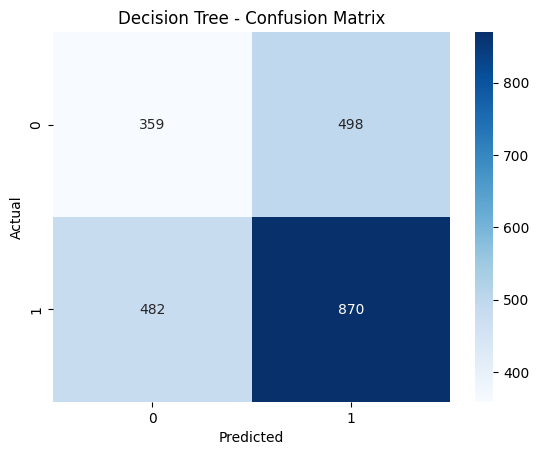


 Random Forest 
-------------------------
Accuracy:   0.56
Recall:     0.69
ROC AUC:    0.54


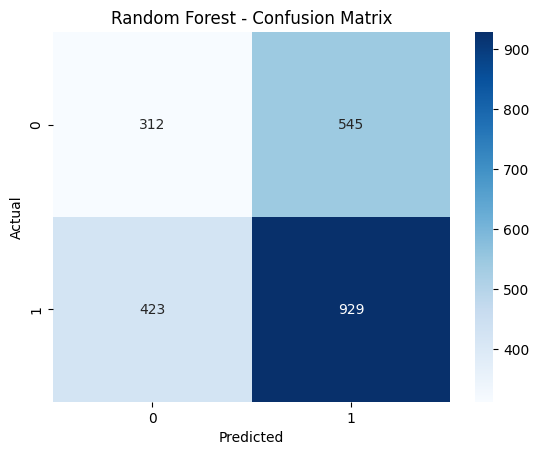

In [76]:
#training & evaluation
for name, model in models.items():
    print(f"\n {name} ")
    print('-----'*5)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Accuracy:  ", round(accuracy_score(y_test, y_pred), 2))
    print("Recall:    ", round(recall_score(y_test, y_pred), 2))
    print("ROC AUC:   ", round(roc_auc_score(y_test, y_proba), 2))

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
